# Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
import itertools

# Sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier

# Importing Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataMiningProject/SLI_data/SLI_INTERSPEECH2009_Functionals_Final2.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Mining/Data Mining Project/SLI_data/SLI_INTERSPEECH2009_Functionals_Final2.csv')

# Setup

## Train Test split

we have 98 children in our dataset. 44 healthy kids and 54 children suffering from SLI. I've chosen 10 10 children to be in test data. half of them (5) are healthy.

In [ ]:
# P 10, 20, 32, 43, 56
# H 26, 35, 44, 51, 68
## selected children to be in test data
df_test = df[df['patient_ID'].isin(['P10', 'P20', 'P32', 'P43', 'P56', 'H26', 'H35', 'H44', 'H51', 'H68']) ]
df_train = df.drop(df_test.index)
df_train.shape, df_test.shape

((3431, 386), (380, 386))

In [ ]:
X_train = df_train.drop(['Label', 'patient_ID'], axis=1)
y_train = df_train['Label']
X_test = df_test.drop(['Label', 'patient_ID'], axis=1)
y_test = df_test['Label']
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3431, 384), (380, 384), (3431,), (380,))

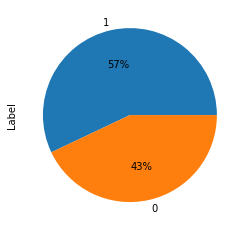

In [ ]:
df_train['Label'].value_counts().plot(kind='pie', autopct='%1.0f%%')

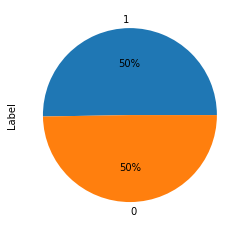

In [ ]:
df_test['Label'].value_counts().plot(kind='pie', autopct='%1.0f%%')

## Determine Baseline 

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf_scores = cross_val_score(dummy_clf, X_train, y_train, cv=6)
print(dummy_clf_scores) ## mean accuracy
print(dummy_clf_scores.mean())

[0.56993007 0.56993007 0.56993007 0.56993007 0.57167832 0.5709282 ]
0.570387799590952


# Modelling

## Decision Tree

In [ ]:
dc_tree = DecisionTreeClassifier()
dc_tree_scores = cross_val_score(dc_tree, X_train, y_train, cv=6)
print(dc_tree_scores)
print(dc_tree_scores.mean())

[0.91608392 0.93881119 0.98776224 0.97202797 0.96678322 0.98598949]
0.9612430039312702


### Hyperparameter Tuning

In [ ]:
parameters = {'max_depth':[40,50,60,70],
              'min_samples_split':[35,40],
              'min_samples_leaf':[8,10,15]}

dc_tree = DecisionTreeClassifier(random_state = 42, criterion='entropy')
clf = GridSearchCV(estimator=dc_tree,
                   param_grid=parameters,
                   cv=6)
clf = clf.fit(X=X_train, y=y_train)
clf.best_params_

{'max_depth': 40, 'min_samples_leaf': 10, 'min_samples_split': 35}

In [ ]:
dc_tree_scores = cross_val_score(clf.best_estimator_, X_train, y_train, cv=6)
print(dc_tree_scores)
print(dc_tree_scores.mean())

[0.94755245 0.98076923 0.98426573 0.96678322 0.98601399 0.95796848]
0.970558848623647


## SVM

In [ ]:
svm_clf = SVC()
svm_clf_scores = cross_val_score(svm_clf, X_train, y_train, cv=6)
print(svm_clf_scores)
print(svm_clf_scores.mean())

[0.82867133 0.96153846 0.99825175 0.98251748 0.99825175 1.        ]
0.9615384615384616


### Hyperparameter Tuning

In [ ]:
## Checked both poly and the other, poly perfomance was better so we chose this one

parameters = {'C':[0.3, 0.5, 0.7, 1.0, 2.0, 4.0],
              'degree':list(range(2,7))}

svm = SVC(random_state=42, kernel="poly")
clf = GridSearchCV(estimator=svm,
                   param_grid=parameters,
                   cv=6)
clf = clf.fit(X=X_train, y=y_train)
clf.best_params_
#96.47 %

{'C': 0.5, 'degree': 2}

In [ ]:
parameters = {'C':[0.3, 0.5, 0.7, 1.0, 2.0, 4.0],
              'kernel':['linear', 'rbf', 'sigmoid'],
              }
svm = SVC(random_state=42)
clf = GridSearchCV(estimator=svm,
                   param_grid=parameters,
                   cv=6)
clf = clf.fit(X=X_train, y=y_train)
clf.best_params_
#96.47 %

In [ ]:
svm_scores = cross_val_score(clf.best_estimator_, X_train, y_train, cv=6)
print(svm_scores)
print(svm_scores.mean())

[0.84265734 0.96853147 0.9965035  0.98251748 0.99825175 1.        ]
0.9647435897435898


## Neural Networks

In [ ]:
mlp_clf = MLPClassifier()
mlp_clf_score = cross_val_score(mlp_clf, X_train, y_train, cv=6)
print(mlp_clf_score)
print(mlp_clf_score.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[0.81993007 0.95804196 0.9965035  0.98601399 0.99825175 0.99299475]
0.9586226674668005


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


### Hyperparameter Tuning

In [ ]:
num_layer_fixed = [(400),(500),(400,200),(350, 85),(500, 200), (400,200,100),]
            
parameters = {'learning_rate_init': [1e-2, 1e-3],
                'hidden_layer_sizes':num_layer_fixed,
                'activation':['tanh', 'relu']}

mlp = MLPClassifier(random_state=42, solver='adam')
clf = GridSearchCV(estimator=mlp,
                         param_grid=parameters,
                         cv=6)
clf = clf.fit(X=X_train, y=y_train)
clf.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


{'activation': 'relu',
 'hidden_layer_sizes': (400, 200, 100),
 'learning_rate_init': 0.01}

In [ ]:
mlp_clf_score = cross_val_score(clf.best_estimator_, X_train, y_train, cv=6)
print(mlp_clf_score)
print(mlp_clf_score.mean())

[0.9020979  0.95629371 0.99475524 0.96678322 0.98776224 0.99124343]
0.9664892900444565


## Ensemble Methods

### Stacking

In [ ]:
from pandas.core.common import random_state
base_models = [
              ('mlp', MLPClassifier(random_state=42,
                                    solver='adam',
                                    activation='relu',
                                    hidden_layer_sizes=(400,200,100),
                                    learning_rate_init=0.01)),
              ('svm', SVC(random_state=42, kernel="poly", C=0.5, degree=2)), 
              ('dc_tree', DecisionTreeClassifier(random_state = 42,
                                                criterion='entropy',
                                                max_depth=40,
                                                min_samples_leaf=10,
                                                min_samples_split=35)),
]
meta_model = LogisticRegression(random_state=42)
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=10, random_state=42)

In [ ]:
stacked_model_score = cross_val_score(stacked_model, X_train, y_train, cv=6)
print(stacked_model_score)
print(stacked_model_score.mean())

[0.86713287 0.97727273 0.99300699 0.97552448 0.99475524 0.99474606]
0.967073061206161


### Adaboost

Hyper-parameter tuning

In [ ]:
# run for three times to find the best set

param_grid = {"n_estimators" : np.arange(85, 116, 10),
              "learning_rate": np.arange(0.7, 1.01, 0.1), 
             }

ABC = AdaBoostClassifier(random_state=42)
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid)
grid_search_ABC = grid_search_ABC.fit(X=X_train, y=y_train)
grid_search_ABC.best_params_

{'learning_rate': 0.7999999999999999, 'n_estimators': 95}

In [ ]:
abc = AdaBoostClassifier(random_state=42, learning_rate=0.8, n_estimators= 95)
ada_clf_score = cross_val_score(abc, X_train, y_train, cv=6)
print(ada_clf_score)
print(ada_clf_score.mean())

[0.93881119 0.98776224 0.9965035  0.97552448 0.99475524 0.99649737]
0.9816423360644025


# Evaluation

## Comparing all models

In [ ]:
cv_results = {}

##### Decision Tree ######
dc_tree = DecisionTreeClassifier(random_state = 42,
                                 criterion='entropy',
                                 max_depth=40,
                                 min_samples_leaf=10,
                                 min_samples_split=35)

##### SVM ######
svm = SVC(random_state=42, kernel="poly", C=0.5, degree=2)

##### Multi Layer Perceptron ######
mlp = MLPClassifier(random_state=42,
                    solver='adam',
                    activation='relu',
                    hidden_layer_sizes=(400,200,100),
                    learning_rate_init=0.01)

##### AdaBoost Classifier ######
abc = AdaBoostClassifier(random_state=42, learning_rate=0.8, n_estimators= 95)

##### Stacking Classifier ######
base_models = [('mlp', mlp),
              ('svm', svm), 
              ('dc_tree', dc_tree)]          
meta_model = LogisticRegression(random_state=42)
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=10, random_state=42)

##### Results ######
cv_results['DicisionTree'] = cross_val_score(dc_tree, X_train, y_train, cv=6)
cv_results['SVM'] = cross_val_score(svm, X_train, y_train, cv=6)
cv_results['NN'] = cross_val_score(mlp, X_train, y_train, cv=6)
cv_results['AdaBoost'] = cross_val_score(abc, X_train, y_train, cv=6)
cv_results['StackedModel'] = cross_val_score(stacked_model, X_train, y_train, cv=6)

cv_results_df = pd.DataFrame().from_dict(cv_results)


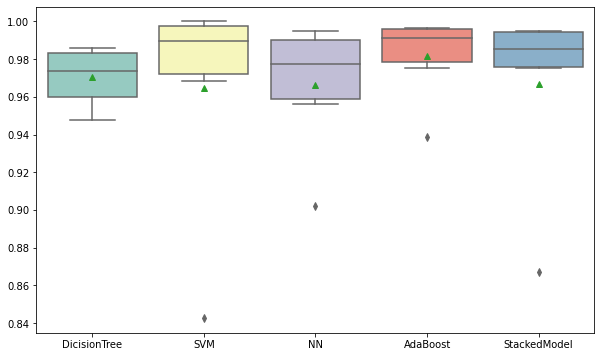

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=cv_results_df, showmeans=True, palette="Set3", ax=ax)

## Evaluating best model performance

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
def get_metric(y_true, y_pred):
  model_metrics = {}
  model_metrics['accuracy'] = metrics.accuracy_score(y_true, y_pred)
  model_metrics['precision_score'] = metrics.precision_score(y_true, y_pred)
  model_metrics['recall_score'] = metrics.recall_score(y_true, y_pred)
  model_metrics['f1_score'] = metrics.f1_score(y_true, y_pred, average="micro")
  model_metrics['cm'] = metrics.confusion_matrix(y_true, y_pred)
  tn, fp, _, _ = metrics.confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()
  model_metrics['specificity'] = float(tn / (tn + fp)) if (tn + fp) != 0 else 0
  return model_metrics

In [ ]:
## Best model Architecture

abc = AdaBoostClassifier(random_state=42, learning_rate=0.8, n_estimators= 95).fit(X_train, y_train)

y_pred_train = abc.predict(X_train)
y_pred_test = abc.predict(X_test)

In [ ]:
Train_metrics = get_metric(y_train, y_pred_train)
Test_metrics = get_metric(y_test, y_pred_test)

In [ ]:
print(f"Best model Train metrics:\n",
      f"accuracy: {Train_metrics['accuracy']}\n",
      f"precision: {Train_metrics['precision_score']}\n",
      f"recall: {Train_metrics['recall_score']}\n",
      f"f1: {Train_metrics['f1_score']}\n",
      f"specificity: {Train_metrics['specificity']}")

Best model Train metrics:
 accuracy: 1.0
 precision: 1.0
 recall: 1.0
 f1: 1.0
 specificity: 1.0


In [ ]:
print(f"Best model Test metrics:\n",
      f"accuracy: {Test_metrics['accuracy']}\n",
      f"precision: {Test_metrics['precision_score']}\n",
      f"recall: {Test_metrics['recall_score']}\n",
      f"f1: {Test_metrics['f1_score']}\n",
      f"specificity: {Test_metrics['specificity']}")

Best model Test metrics:
 accuracy: 0.95
 precision: 0.9942528735632183
 recall: 0.9057591623036649
 f1: 0.9500000000000001
 specificity: 0.9947089947089947


Confusion matrix, without normalization
[[1474    0]
 [   0 1957]]


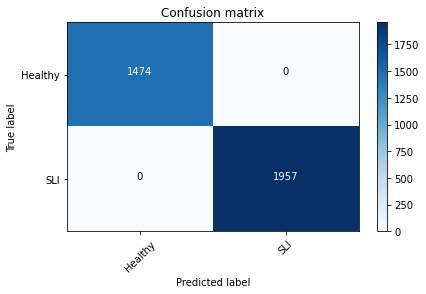

In [ ]:
label_names = ['Healthy', 'SLI']
plot_confusion_matrix(cm=Train_metrics['cm'], classes=label_names)

Confusion matrix, without normalization
[[188   1]
 [ 18 173]]


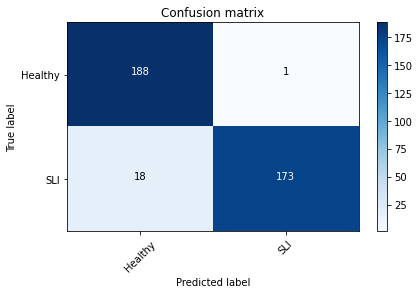

In [ ]:
label_names = ['Healthy', 'SLI']
plot_confusion_matrix(cm=Test_metrics['cm'], classes=label_names)